### 지역별 인구 구조 분석

* 지역명을 입력변수로 받아 인구구조(나이, 성별)를 분석한다.
* 데이터출처 : 행정안전부(https://mois.go.kr)
* 데이터는 2020년 12월 기준이다.

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림


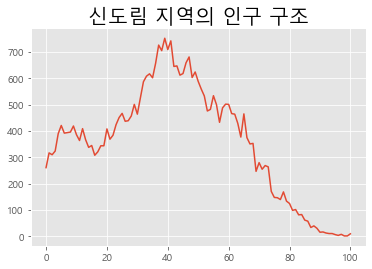

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import csv

f = open('data/ages.csv')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data :
    if name in row[0] :
        # np.array로 만들기 (요소들 사이에 콤마가 없다)
        home = np.array(row[3: ], dtype = int)

plt.rc('font', family = 'Malgun Gothic')
plt.title(name + ' 지역의 인구 구조', fontsize = 20)
plt.plot(home)
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 미사1동


C:\Users\asuspc\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


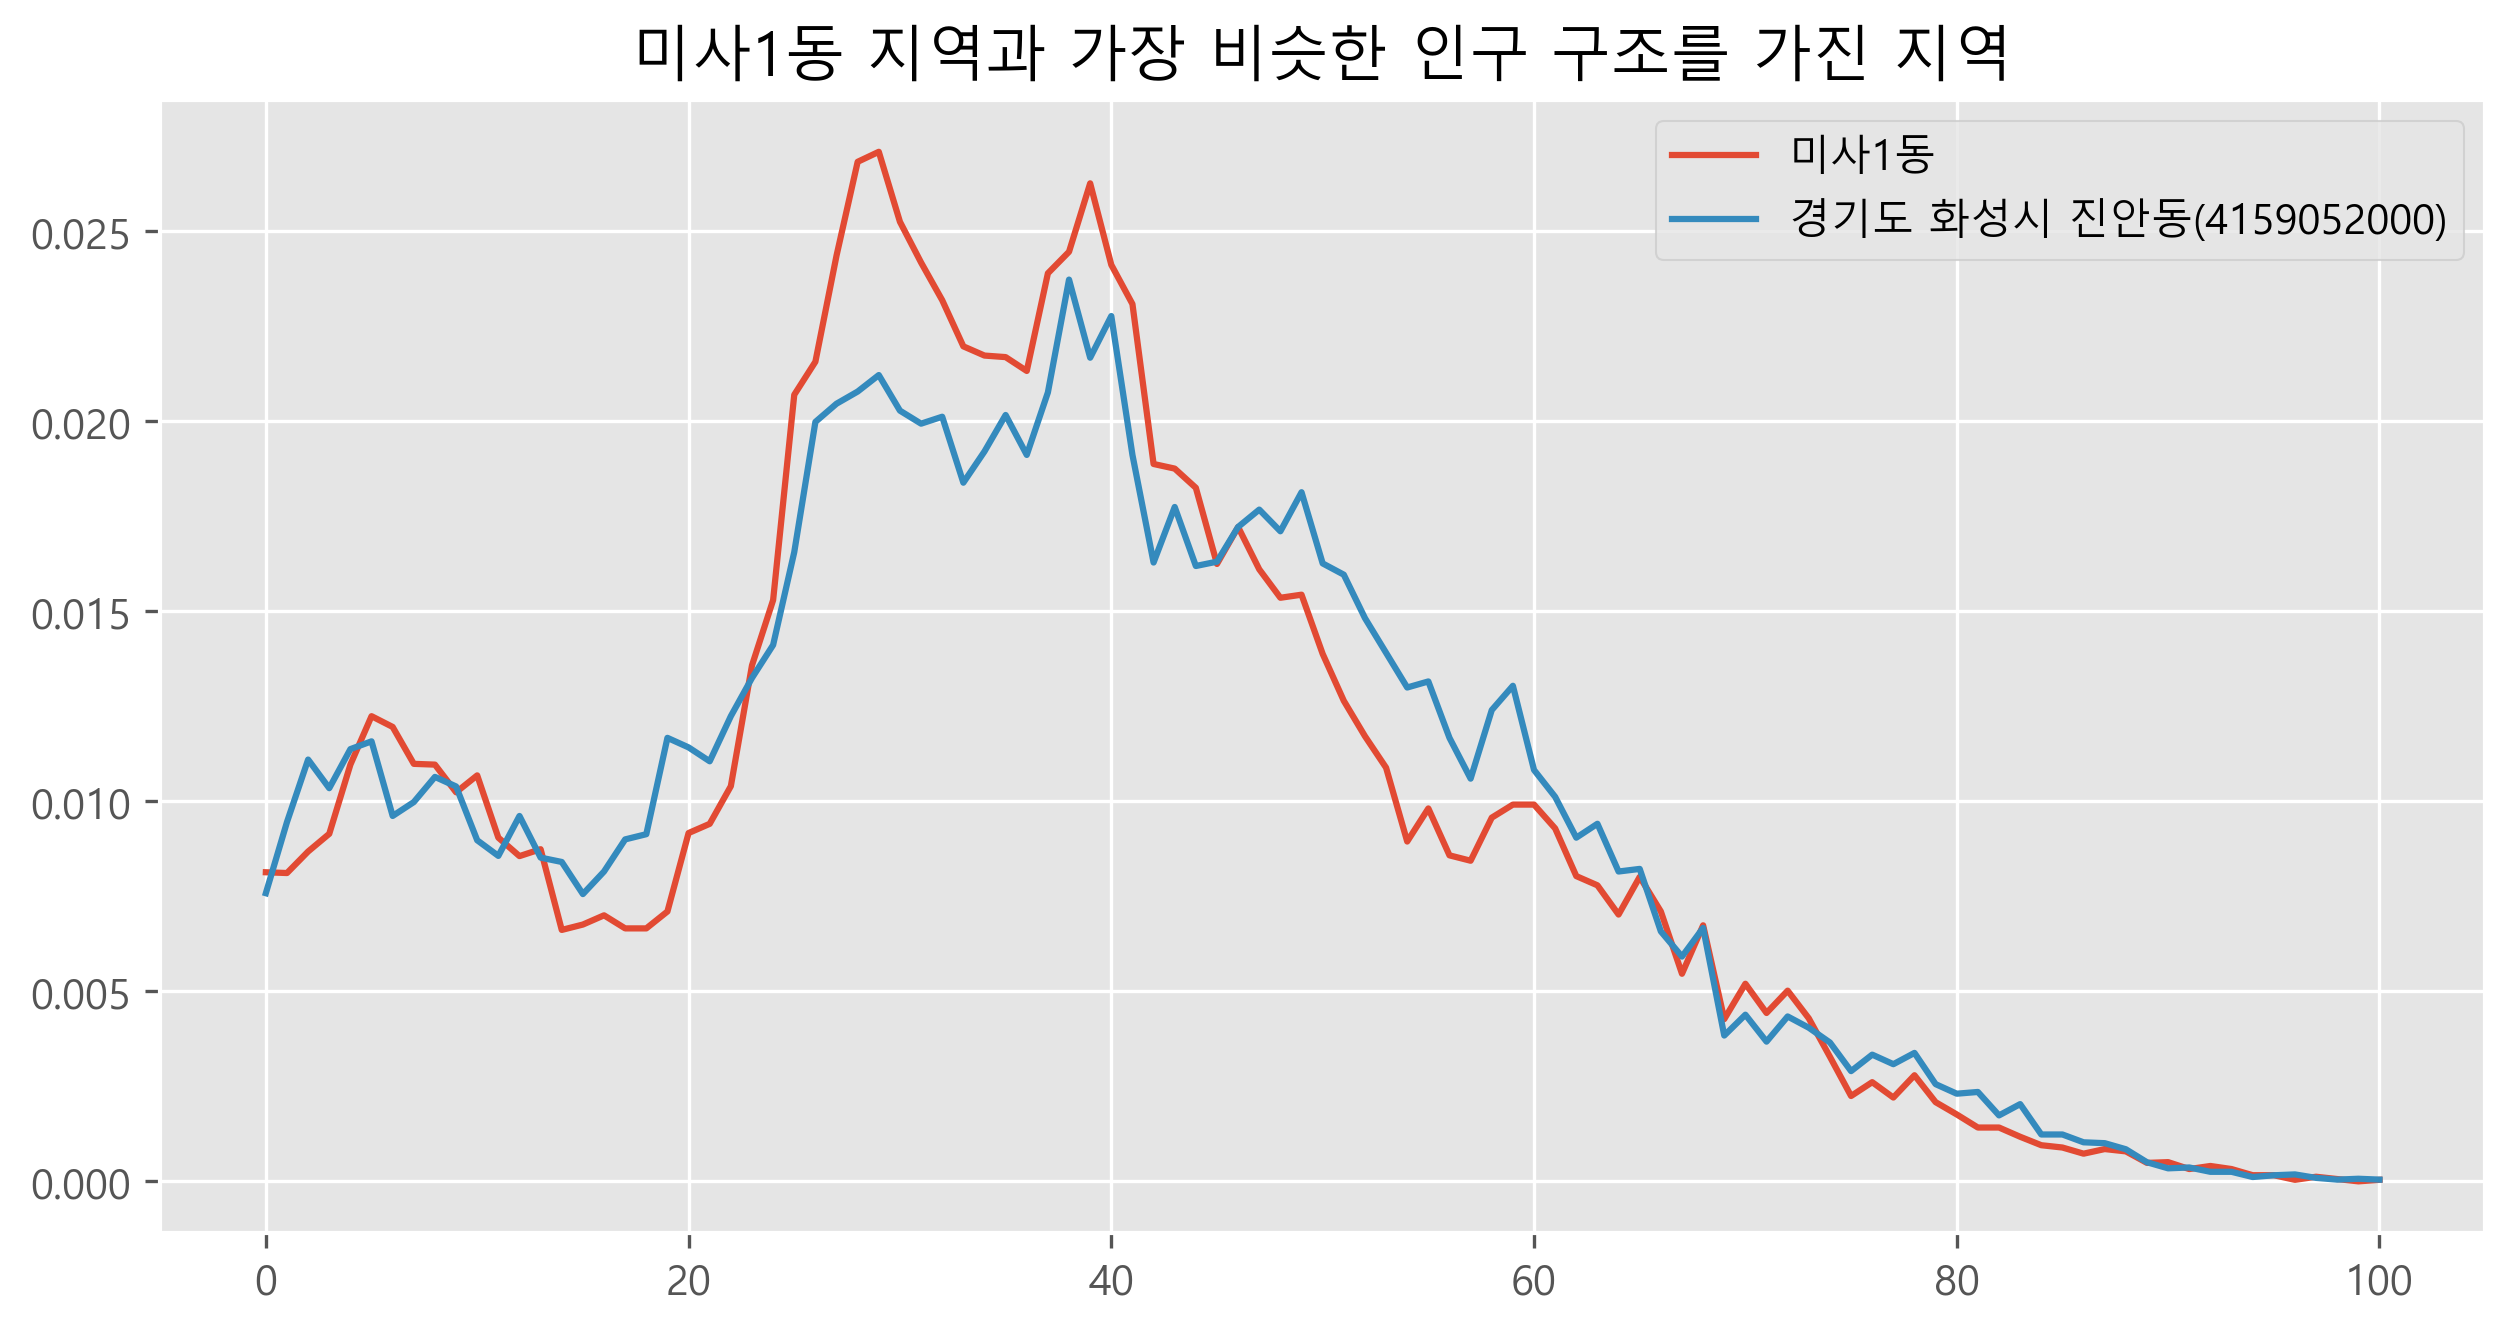

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import csv

f = open('data/ages.csv')
data = csv.reader(f)
next(data)
data = list(data)                    # 읽어온 데이터 리스트화
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1                                # 최솟값 저장할 변수
result_name = ''                      # 최솟값에 해당하는 지역의 이름 저장할 변수
result = 0                            # 해당 지역의 연령대별 인구 비율 저장할 배열

for row in data :
    if name in row[0] :
        home = np.array([i.replace(',','') for i in row[3: ]], dtype = int) / int(row[2].replace(',',''))   # 인구수 형변환하고 전체인구수로 나눠 비율로 저장
for row in data[2:] :
    away = np.array([i.replace(',','') for i in row[3: ]], dtype = int) / int(row[2].replace(',',''))
    s = np.sum((home - away) ** 2)                   # 편차의 절대값 or 제곱값 처리
    if s < mn and name not in row[0] :               # input에 입력한 name이 row[0]에 없다는 조건 추가
        mn = s
        result_name = row[0]
        result = away
        
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 300)
plt.rc('font', family = 'Malgun Gothic')
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

찾을 지역의 이름(시군구)을 입력해주세요 : 하남시
찾을 지역의 이름(읍면동)을 입력해주세요 : 미사1동
그래프의 스타일을 지정해주세요 : 1. ggplot / 2. seaborn-dark-palette / 3. Solarize_Light22


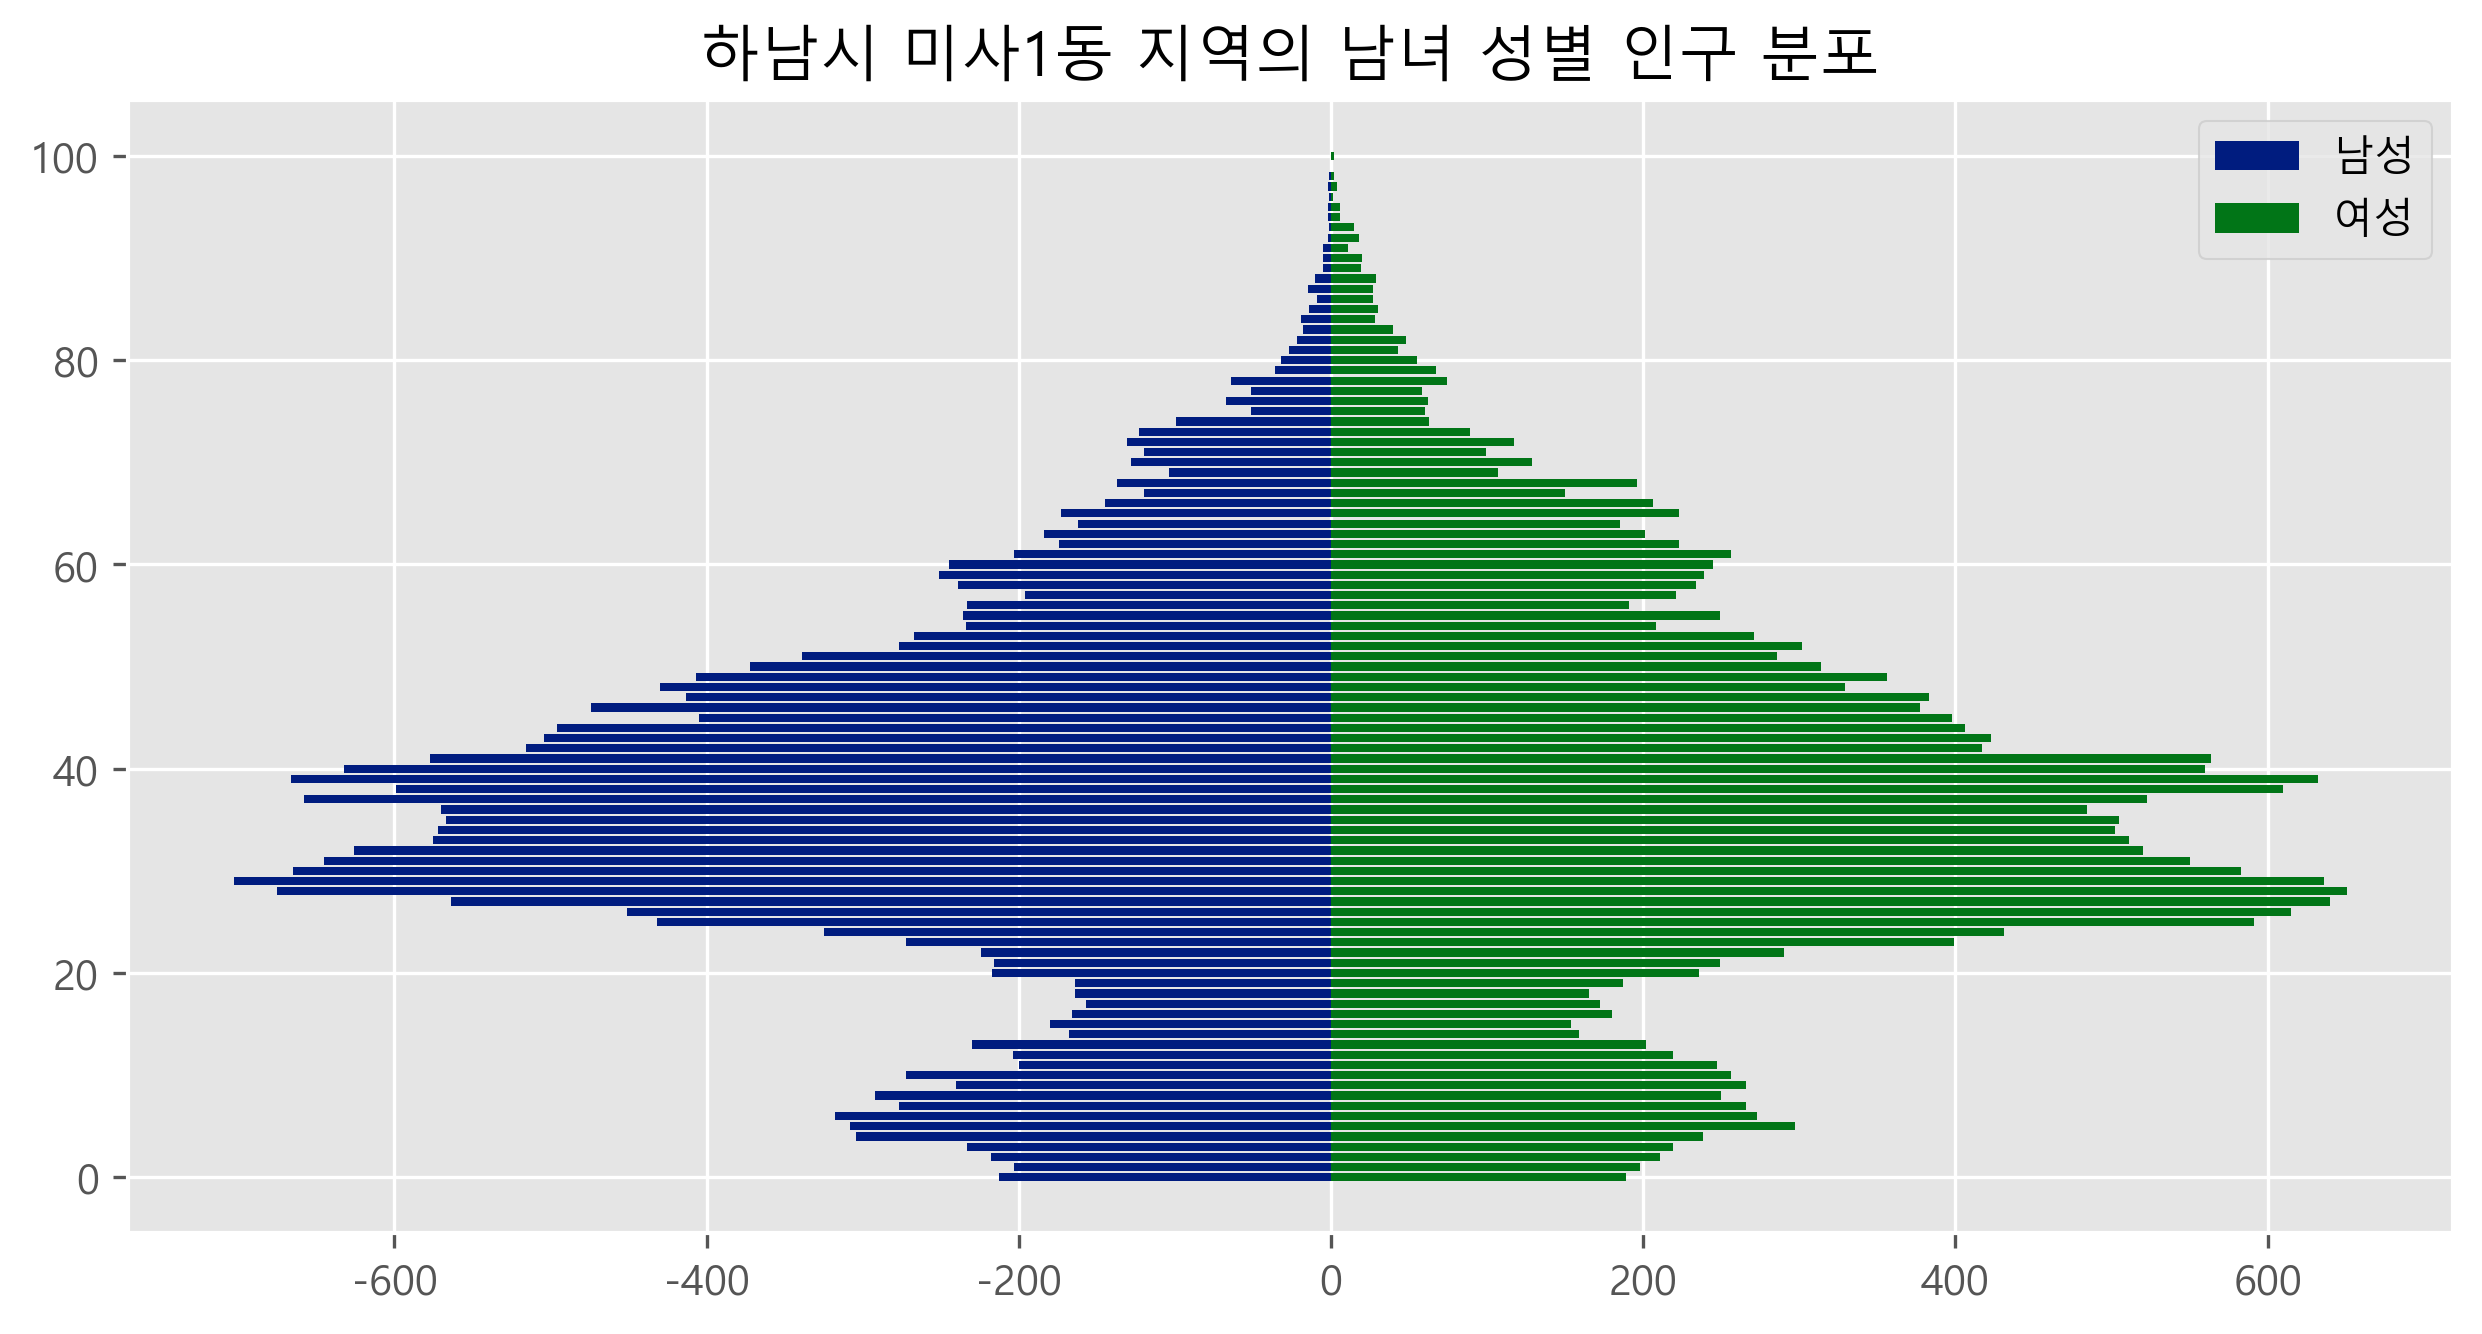

In [72]:
import csv
import matplotlib.pyplot as plt

f = open('data/genders.csv')
data = csv.reader(f)
m = []
f = []

city = input('찾을 지역의 이름(시군구)을 입력해주세요 : ')
town = input('찾을 지역의 이름(읍면동)을 입력해주세요 : ')
gptype = int(input("그래프의 스타일을 지정해주세요 : 1. ggplot / 2. seaborn-dark-palette / 3. Solarize_Light2"))

if gptype == 1 :
    style_name = 'ggplot'
elif gptype == 2 :
    style_name = 'seaborn-dark-palette'
elif gptype == 3 :
    style_name = 'Solarize_Light2'
else :
    style_name = 'fivethirtyeight'
    
for row in data :
    if city in row[0] and town in row[0] :
        for i in row[3:104] :
            m.append(-int(i))
        for i in row[106: ] :
            f.append(int(i))

plt.style.use(style_name)
plt.figure(figsize = (10, 5), dpi = 300)
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(city + ' '+ town + ' 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f, label = '여성')
plt.legend()
plt.show()

찾고 싶은 지역의 이름을 알려주세요 : 미사1동


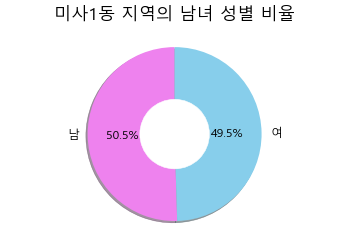

In [75]:
import csv
import matplotlib.pyplot as plt

f = open('data/genders.csv')
data = csv.reader(f)
size = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
inner_circle = []

for row in data :
    if name in row[0] :
        m = f = 0
        for i in range(101) :
            m = m + int(row[i + 3])
            f = f + int(row[i + 106])
        break
size.append(m)
size.append(f)

plt.rc('font', family = 'Malgun Gothic', size = 12)
color = ['violet', 'skyblue']
plt.axis('equal')
plt.pie(size, labels = ['남', '여'], autopct = '%.1f%%', colors = color, startangle = 90, shadow=True)
centre_circle = plt.Circle((0,0),0.4,color='white')
plt.gca().add_artist(centre_circle)
plt.title(name + ' 지역의 남녀 성별 비율')
plt.show()